![alt text](https://upload.wikimedia.org/wikipedia/en/d/d9/Tilburg_University_logo.svg)

# Python assignment



|Name| ANR| SNR|
|----|-------|-------|
|Andrea Casarico|100650|2012315|
|Franklin Slettehaugh|992924|2001075|



# Table of Contents
    
    Research Question
        
        Method and Motivation
        
        Assumptions and formulas
             
    Specification of the model's base parameters
    
        Basic model 
    
        Specification of human capital
    
        Simulation of the model
    
        Results
        
    Extension
        
        Simulation of the model with pension benefits and taxation
        
        Results defined benefits
        
        Results defined contribution
                
    Conclusion
        
    
    

#  Research Question

We research how the economic lifecycle of an individual would look like from the first day of employment until death under different pension systems.

#  Method and Motivation


This code is based on and reproduces part of the results in the paper written by [Bovenberg et al.](http://arno.uvt.nl/show.cgi?fid=62172).  We thought this would be interesting because this is a process virtually everyone goes through and it may be interesting to see if there are pension systems that provide more benefits than others. To answer this question we conduct simulations of a person's wealth and consumption in python based on variables we found in the aforementioned paper.

# Assumptions 

The code models and simulates the financial life of an individual who starts working at age 20, retires at 65 and dies at 80 years old, death is perfectly predictable. The main variables we model are consumption, financial wealth, share of risky assets over total assets and total wealth. These variables are constructed using the aforementioned lifecycle parameters and other specific economic and preference parameters (e.g. risk-free rate and a rate of time preference of 2%). The individual's goal is to maximize utility and consumption over his life-time. They are risk-averse, and there are no bequests. With the respect to the labor market, labor supply is fixed and wages are constant and normalized at one. For the financial market the risk-free rate is equal to 2% and the market-equity premium is equal to 4%, with a standard deviation of 20%. Moreover, we are assuming that financial returns are I.I.D and follow a normal distribution. Additionally, we are assuming that human capital is given as a risk-free asset owned by the individual. And, that an individual can borrow using its human capital as a collateral to finance its consumption. 

First, we start by moddeling a basic system without pension provided by the government at retirement. Every individual invests in order to guarantee funds for his or her survival at retirement because they cannot earn money from labor anymore. Secondly, we extend on this model by introducing pension benefits which are (at least partly) funded by taxation on financial wealth. We differentiate between two systems, a defined benefit (DB) system where an individual is promised a certain pension independently of what this person has contributed troughout the years. And, a defined contribution system where an individual is required to make contributions (DC) independently of what this person is going to receive, in the form of pension benefits, at retirement.





#  Specification of the model's base parameters

In [1]:
#  SPECTIFICATION OF MODEL PARAMETERS

# lifecycle parameters

D = 60 # Time elapsed from start age until death
T = 45 # Working life
deltat = 1
start_age = 20 # Start age in the model stands for when an individual enter the labor market

# economic parameters
r = 0.02 # risk-free rate
equity_premium = 0.04 # Premium from equity
rm = r + equity_premium # Average market return
sigma = 0.2 # Standard deviation of market returns
_lambda = 0.04 / sigma # Sharpe ratio

# preference parameters
theta = 5 # Risk aversion coefficient
rho = 0.02 # Rate of time preference

#  Basic model



#  Specification of human capital

In their paper Bovenberg et al. model human capital such as it starts being paid out when an individual enters the labor market at age 20 and is fully depleted at a constant rate by the time the individual retires at age 65. The wage is thus constant over an individual's lifetime, labor-market risks do not exist and the labor supply is fixed. Moreover, death is perfectly predictable. 

In [2]:
# SPECTIFICATION OF HUMAN CAPITAL

# specification of age, labor earnings (Y) and human capital (H)

import numpy as np
import math

age=np.arange(start_age, start_age+D, deltat) # Creates an array for age starting from start_age ending at start_age+D and increasing by deltat

print('age', age)

Y = np.where(age<65, 1, 0) # Creates an array for all values of age, Y equals 1 for all values of age under 65 and equals 0 otherwise

print('y:', Y)

H = (1/r)*(1-np.exp(-r*np.maximum(0, 65-age)))  # equation (A8) from Bovenberg et al.

#other parameters

A = ((1 - theta) * r - rho) / theta + 0.5 * ((1 - theta) / theta ** 2) *( _lambda **2) # equation (A12) from Bovenberg et al.


g = (1/A) * (np.exp(A * (D - (age - start_age))) - 1)  # equation (A11) from Bovenberg et al.

# A and g are fixed parameters from Bovenberg et al. used for defining linear solutions to all functions here presented.

print('Human Capital:',H)

print('A:', A)

print('g:', g)


age [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44
 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69
 70 71 72 73 74 75 76 77 78 79]
y: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Human Capital: [ 29.67151701  29.26085442  28.84189588  28.41447383  27.97841727
  27.53355179  27.07969943  26.61667865  26.14430422  25.6623872
  25.17073481  24.66915038  24.15743328  23.6353788   23.10277812
  22.5594182   22.00508167  21.43954681  20.86258738  20.2739726
  19.67346701  19.06083041  18.43581772  17.79817895  17.14765901
  16.4839977   15.80692954  15.1161837   14.41148386  13.69254815
  12.95908897  12.21081293  11.44742071  10.66860695   9.8740601
   9.06346235   8.23648943   7.39281055   6.53208823   5.65397816
   4.7581291    3.84418268   2.91177332   1.96052804   0.99006633   0.           0.
   0.           0.           0.           0.           0.     

#  Simulation of the basic model

We model a type of pension system where an individual does not pay any taxes on his income and choses to invest either in safe bonds or on the stock market. Consumption during his or her working life is defined by the income earned from labor and his or her return on investments. From age 65, the individual no longer earns income from labor and is solely reliant on income coming from investment. 

In [3]:
# Model simulation

import random

random.seed(311) # Sets the seed for the pseudo-random numbers to be used to generate the variables

Financial_wealth = 0.25 # Start value of financial wealth, initially this equals the first contribution. Here assumed to be a quarter of the first wage.

financial_return_list = [] # Creates an empty list to store values for financial return
financial_wealth_list = [] # Creates an empty list to store values for financial wealth

for i in range(start_age+1, T+start_age+1): # for loop which generates a financial return and financial wealth variable for every value within the specified range
    Financial_return = (math.exp(random.choice([r, random.normalvariate(rm, sigma),0]))) # Generates random values for financial return according to some pre-specified parameters, following a normal distribution
    financial_return_list.append(Financial_return) # Appends the generated values to the empty list 
    Financial_wealth =  (Financial_wealth+0.1)*Financial_return # Generates financial wealth
    financial_wealth_list.append(Financial_wealth) # Appends the generated values to the empty list
    print('Financial_wealth',Financial_wealth)

capital_stock_list = [financial_wealth_list[-1]] # Creates a list for all values of financial wealth where an individual is no longer working
for i in range (T+start_age+1,start_age+D): # For loop for every value from retirement until death
    capital_stock_list.append((capital_stock_list[-1])*(1+r)*math.exp(-(1+r)/6)) # Depreciates the wealth of an individual to 0 from retirement age to death
    print('Capital_stock', capital_stock_list)

zero = 0.000001 # We needed to create this variable that is very close to zero because we ran into some problems further down the code due indivisibility by zero

F_check = (zero, financial_wealth_list, capital_stock_list)
F = [zero] + financial_wealth_list + capital_stock_list[1:] # Generates financial wealth for the complete lifecycle of an individual
F3 = financial_wealth_list + capital_stock_list 
print('Financial Wealth',F)

C = (F+H) * g**(-1) # Equation (A9) from Bovenberg et al.
print('Consumption', C) 

risk_ptf = (1/theta) * (_lambda/sigma) * (1+(H/F3)) # Equation (A10) from Bovenberg et al. 

print('Risky assets/Total assests', risk_ptf)

Total_Wealth = H + Y + F 
print('Total Wealth', Total_Wealth)

Financial_wealth 0.3570704690093645
Financial_wealth 0.46630390497001145
Financial_wealth 0.5558168268573701
Financial_wealth 0.606525171401701
Financial_wealth 0.6187592944637983
Financial_wealth 0.7051220829722047
Financial_wealth 0.8051220829722047
Financial_wealth 0.9234067619360516
Financial_wealth 1.0440809499196029
Financial_wealth 1.144080949919603
Financial_wealth 1.2692130522097382
Financial_wealth 1.3692130522097383
Financial_wealth 1.498893124649175
Financial_wealth 1.598893124649175
Financial_wealth 1.6988931246491752
Financial_wealth 1.8352331763320064
Financial_wealth 1.9352331763320065
Financial_wealth 2.442827524736519
Financial_wealth 2.5941960481931154
Financial_wealth 4.330826982285223
Financial_wealth 4.5203356247540905
Financial_wealth 4.592543530912629
Financial_wealth 4.7873391983709475
Financial_wealth 4.98606999934333
Financial_wealth 5.08606999934333
Financial_wealth 5.290835562802622
Financial_wealth 5.499737665035124
Financial_wealth 5.71285986966713
Financ

#  Plotting results basic model

Utility -9.81110031914
Certain equivalent of consumption (-0.141811485367-0.141811485367j)


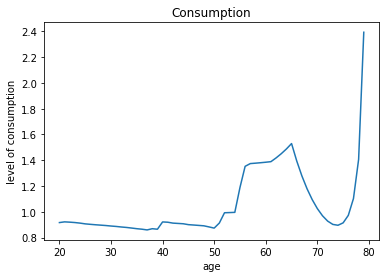

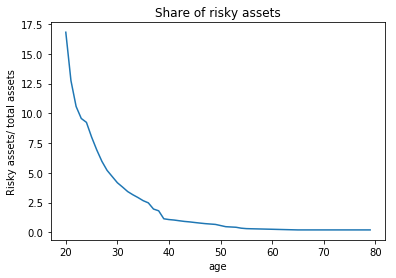

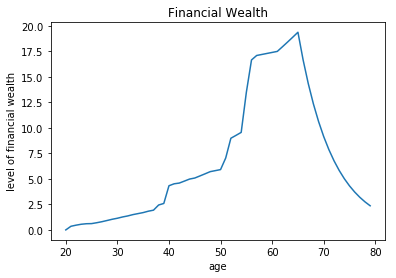

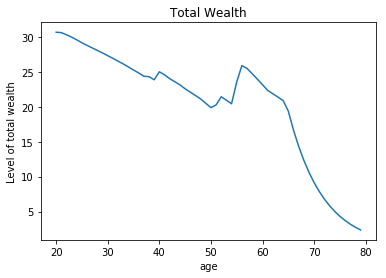

In [4]:
# PLOTTING RESULTS

import matplotlib.pyplot as plt

# calculate welfare

b = np.mean(deltat * (1 / (1 - theta)) * C ** (1 - theta)) # Created as a seperated variable to circumvent a python error
U = sum([math.exp(-rho*x)*b for x in np.arange(1,D+1)]) # Comprehension list to calculate utility

print('Utility',U) # expresses utility in terms of certainty equivalent consumption

K = deltat * (1 / (1 - theta)) ** (1 / (1 - theta))

P = sum([math.exp(-rho *x) * K for x in np.arange(1,D+1)])

ce_consumption = U/P # equation (A27) from Bovenberg et al.
print('Certain equivalent of consumption', ce_consumption) # expresses utility in terms of certainty equivalent consumption

# plot consumption

plt.plot(age, C,)
plt.title("Consumption")
plt.xlabel('age')
plt.ylabel("level of consumption")
plt.show()

# plot portfolio choice

plt.plot(age, risk_ptf)
plt.title('Share of risky assets')
plt.xlabel('age')
plt.ylabel('Risky assets/ total assets')
plt.show()


# plot financial wealth

plt.plot(age, F)
plt.title('Financial Wealth')
plt.xlabel('age')
plt.ylabel('level of financial wealth')
plt.show()

# plot total wealth
plt.plot(age, Total_Wealth)
plt.title('Total Wealth')
plt.xlabel('age')
plt.ylabel('Level of total wealth')
plt.show()

# Extension
# Simulation of the model with pension benefits and taxation


The base model described in the first part of this assignment, does not fit how pension systems in many parts of the world work. In this extension we introduce a system where taxation on financial wealth provides individuals with a pension benefit at retirement. 

We model two types of pension system, first a defined benefit (DB) system where an individual is promised a certain pension independently of what this person has contributed troughout the years. Second, we model a defined contribution system where an individual is required to make contributions (DC), independently of what this person is going to receive at retirement.

In this extension, all previous assumptions remain valid. However, we add three other assumptions.
First of all, the government finances the public pension system by levying a tax on financial returns.
Secondly, the tax revenues will be used to purchase annuities once the individual retires. The type and level of the annuity will depend on whether the system is DC or DB.
Finally, individual investment behaviour is assumed to be exogenous and fixed. This implies that government intervention (taxation and the addition of a public pension next to the privately funded pension fund) does not alter individual behaviour. We ackwnowledge that this is a strong assumption, as in reality individuals do react to public intervention. Although, we do not model this as human behaviour changes from individual to individual. therefore, any model we could have come up with would still be based on strong assumptions about individual behaviour. Thus, because no model would be inherently right, we chose to keep a general model. 

In [5]:
# Specification of relevant parameters for the extension - DC and DB

t = 0.25 # Tax rate
defined_pension_benefit = 0.2 #defined benefit pension
acc = t/(1-t)

In [6]:
# Part 6: Simulation with longer life expectancy

# Declaring varaibles

random.seed(311)

Financial_wealth2=0.25

financial_return_list2 = [] # Creates an empty list to store values for financial return 
financial_wealth_list2 = [] # Creates an empty list to store values for financial wealth 
fl_list = [] # Creates an empty list to store values for the tax accumulations

for i in range(start_age+1, T+start_age+1): # for loop which generates a financial return and financial wealth variable for every value within the specified range
    Financial_return2 = (math.exp(random.choice([r, random.normalvariate(rm, sigma),0]))) # Create random values for financial returns according to some pre-specified parameters assuming a normal distribution
    financial_return_list2.append(Financial_return2) # Append the values to the empty list
    Financial_wealth2=  (Financial_wealth2+0.1)*(Financial_return2*(1-t))
    fl=Financial_return2*acc 
    fl_list.append(fl) # Append the values to the empty list
    financial_wealth_list2.append(Financial_wealth2) # Append the values to the empty list
    print('Financial_wealth 2',Financial_wealth2)

#defined benefit
capital_stock_list2 = [financial_wealth_list2[-1]] # Creates a list for all values where an individual is no longer working
for i in range (T+start_age+1,start_age+D): # For loop for every value from retirement until death
    capital_stock_list2.append(((capital_stock_list2[-1]*(1+r)*math.exp(-(1+r)/6))+defined_pension_benefit)) # Depreciates the wealth of an individual to 0 from retirement age to death accounting for the pension benefits
    print('Capital_stock 2', capital_stock_list2)

#defined contribution
contribution_pension = 0
contribution_pension_list=[] # Creates an empty list to store values of financial wealth for contribution to pension
for i in range (start_age+1, T+start_age+1): # For loop which generates pension contributions from first year of work until retirement
    contribution_pension=(contribution_pension+0.2)*(fl*(1+r)) # Generates the pension contribution variables
    contribution_pension_list.append(contribution_pension) # Appends the generated variables to the empty list
    print('contribution', contribution_pension)
contribution_benefit = (sum(contribution_pension_list)) # Sum all the individual contributions into one variable
print('DC Benefit', contribution_benefit)
   
capital_stock_list3 = [financial_wealth_list2[-1]] # Creates a list for all values of financial wealth where an individual is no longer working
for i in range (T+start_age+1,start_age+D): # For loop for every value from retirement until death
    capital_stock_list3.append(capital_stock_list3[-1]*(1*r)*math.exp(-(1+r)/6)+contribution_benefit/15) # Depreciates the wealth of an individual to 0 from retirement age to death accounting for the pension benefits
    print('Capital_stock 3', capital_stock_list3)

#Defined Benefit - Financial Wealth
F_check2 = (zero, financial_wealth_list2, capital_stock_list2) 
F2= [zero] + financial_wealth_list2+capital_stock_list2[1:] # Generates financial wealth for the complete lifecycle of an individual under defined benefit system
F2_star = financial_wealth_list2+capital_stock_list2 # Generated in order to make share of risky assets work as it did not work when started with zero

C2 = (F2+H)*g**(-1)
print('Consumption DB', C2)

risk_ptf2 = (1/theta)*(_lambda/sigma)*(1+H/F2_star)

print('Risky assets/Total assests DB', risk_ptf2)

Total_Wealth2=H+Y+F2
print('Total Wealth DB', Total_Wealth2)

#Defined contribution - Financial Wealth
F_check3 = (zero, financial_wealth_list2, capital_stock_list3) 
F3= [zero] + financial_wealth_list2+capital_stock_list3[1:] # Generates financial wealth for the complete lifecycle of an individual under defined contribution system
F3_star = financial_wealth_list2+capital_stock_list3 # Generated in order to make share of risky assets work as it did not work when started with zero
print('Financial Wealth3',F3)

C3 = (F3+H)*g**(-1) # Equation (A9) from Bovenberg et al. 
print('Consumption DC', C3)

risk_ptf3 = (1/theta)*(_lambda/sigma)*(1+H/F3_star) # Equation (A10) from Bovenberg et al. 

print('Risky assets/Total assests DC', risk_ptf3)

Total_Wealth3=H+Y+F3
print('Total Wealth DC', Total_Wealth3)

Financial_wealth 2 0.2678028517570234
Financial_wealth 2 0.28142472167113314
Financial_wealth 2 0.2807709914547976
Financial_wealth 2 0.264113981296729
Financial_wealth 2 0.2391622966432215
Financial_wealth 2 0.24954546005535214
Financial_wealth 2 0.26215909504151413
Financial_wealth 2 0.2771063955481724
Financial_wealth 2 0.28854333755317896
Financial_wealth 2 0.2914075031648842
Financial_wealth 2 0.2994858444190061
Financial_wealth 2 0.2996143833142546
Financial_wealth 2 0.3057653470133761
Financial_wealth 2 0.3043240102600321
Financial_wealth 2 0.30324300769502405
Financial_wealth 2 0.30854179260516224
Financial_wealth 2 0.30640634445387166
Financial_wealth 2 0.3658477377449833
Financial_wealth 2 0.35644386472189854
Financial_wealth 2 0.5502882965482099
Financial_wealth 2 0.49756874365665005
Financial_wealth 2 0.44548070056631417
Financial_wealth 2 0.4173751062573654
Financial_wealth 2 0.39587008252518696
Financial_wealth 2 0.3719025618938902
Financial_wealth 2 0.3610767195046544
Fi

# Plotting Results Defined Benefits

Utility DB -9.81110031914
Certain equivalent of consumption DB (-5138.12636604-5138.12636604j)


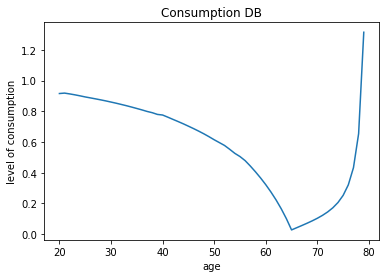

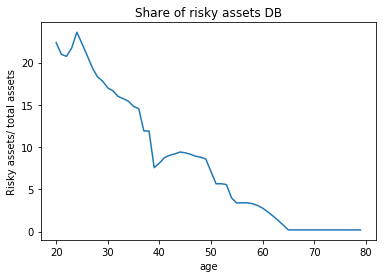

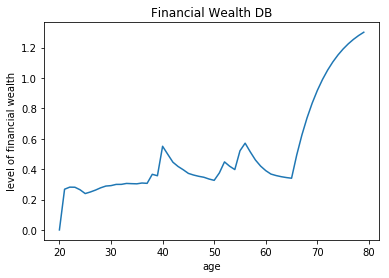

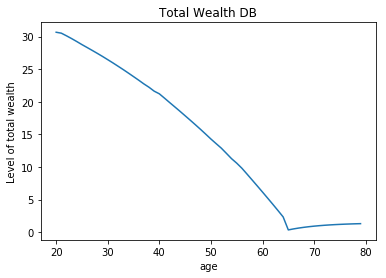

In [7]:
# PLOTTING RESULTS EXTENSION - DB

# calculate welfare

b2 = np.mean(deltat * (1 / (1 - theta)) * C2 ** (1 - theta)) # Created as a seperated variable to circumvent a python error
U2 = sum([math.exp(-rho*x)*b2 for x in np.arange(1,D+1)]) # Comprehension list to calculate utility under DB

print('Utility DB',U) # expresses utility in terms of certainty equivalent consumption

ce_consumption2 = U2/P # equation (A27) from Bovenberg et al.
print('Certain equivalent of consumption DB', ce_consumption2) # expresses utility in terms of certainty equivalent consumption fo DB

# plot consumption

plt.plot(age, C2,)
plt.title("Consumption DB")
plt.xlabel('age')
plt.ylabel("level of consumption")
plt.show()

# plot portfolio choice

plt.plot(age, risk_ptf2)
plt.title('Share of risky assets DB')
plt.xlabel('age')
plt.ylabel('Risky assets/ total assets')
plt.show()


# plot financial wealth

plt.plot(age, F2)
plt.title('Financial Wealth DB')
plt.xlabel('age')
plt.ylabel('level of financial wealth')
plt.show()

# plot total wealth
plt.plot(age, Total_Wealth2)
plt.title('Total Wealth DB')
plt.xlabel('age')
plt.ylabel('Level of total wealth')
plt.show()

#  Plotting Results Defined Contribution

Utility DC -1295202.9006
Certain equivalent of consumption DC (-18721.1058099-18721.1058099j)


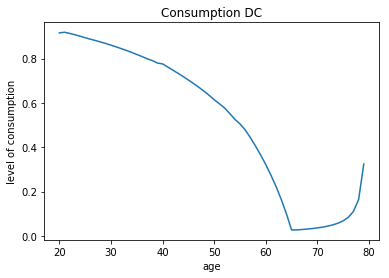

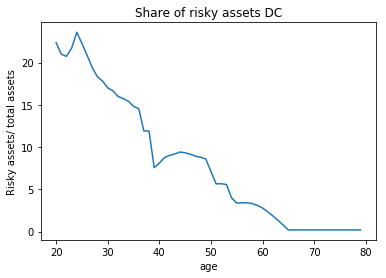

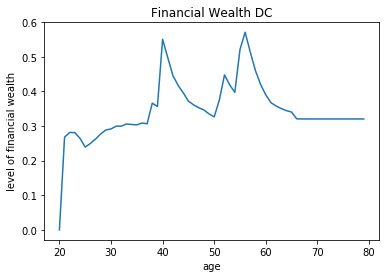

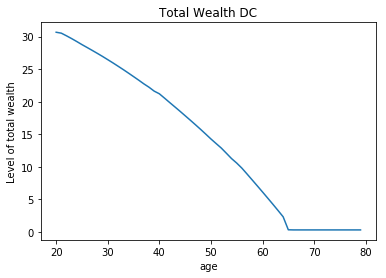

In [8]:
# PLOTTING RESULTS EXTENSION - DC

# calculate welfare

b3 = np.mean(deltat * (1 / (1 - theta)) * C3 ** (1 - theta)) # Created as a seperated variable to circumvent a python error
U3 = sum([math.exp(-rho*x)*b3 for x in np.arange(1,D+1)]) # Comprehension list to calculate utility under DC

print('Utility DC',U3) # expresses utility in terms of certainty equivalent consumption

ce_consumption3 = U3/P #  equation (A27) from Bovenberg et al.
print('Certain equivalent of consumption DC', ce_consumption3) # expresses utility in terms of certainty equivalent consumption under DC

# plot consumption

plt.plot(age, C3,)
plt.title("Consumption DC")
plt.xlabel('age')
plt.ylabel("level of consumption")
plt.show()

# plot portfolio choice

plt.plot(age, risk_ptf3)
plt.title('Share of risky assets DC')
plt.xlabel('age')
plt.ylabel('Risky assets/ total assets')
plt.show()


# plot financial wealth

plt.plot(age, F3)
plt.title('Financial Wealth DC')
plt.xlabel('age')
plt.ylabel('level of financial wealth')
plt.show()

# plot total wealth
plt.plot(age, Total_Wealth3)
plt.title('Total Wealth DC')
plt.xlabel('age')
plt.ylabel('Level of total wealth')
plt.show()

#  Results and Conclusion

The level of consumption of an individual depends on its income from labor, human capital, financial return and risk aversion. We can see that in the simulated basic model utility is negative at -18,42 and, the certainty equivalent of consumption which represents a guanranteed amount an individual would accept over taking an uncertain higher pay-off, is also negative and close to 0. Moreover, when looking at the graphs of the basic model consumption stays constant at first, then abruptly rises, falls at retirement until it steeply rises again right before death. When looking at the graph plotting financial wealth one can see there is a weak positive relation between both graphs. From age 65 when an individual retires, consumption falls because he or she does not receive any income from labor and has to rely solely on its wealth accumulated by that age to survive until death, this is deepned by the fact the individual is modeled as risk-averse, by the end of its lifetime consumption rises alot since the person wants to consume all of its wealth before dying as there are no transferse of wealth between generations. Total wealth decreases overtime since human capital is linearly exhausted until retirement and individuals receive no more income after retirement. Moreover, individuals seem to have a bigger appetite for risky investments early-on in their life time, which makes sense as they then still have a long period to make-up for losses in case such investment do no pay off.

In the extended model, utility fairly differs between the DB and DC systems. Namely, in the DC system utility is lower than in the DB one. Which, makes sense since in the DC you make contributions are re-invested in the market. Thus, exposition to risk is not reduced and taxation reduces dispobale wealth. With respect to the graphs regarding consumption, share of risky assets, financial wealth and total wealth both systems yield the same results. Consumption falls until retirement after which it slowly rises until a few years before death when it steeply rises as death is perfectly predictable and individuals want to consume all their wealth before dying. In the DB and DC systems, the riskiness of assets in which individuals invest also decreases overtime. The intuition is the same as in the basic pension system. Financial wealth at the final stage of life does not reach zero as pension benefits are a type of financial wealth, and in this model they never fall to zero. Total wealth differs from the basic version since in the basic version of the model individuals do not earn any income anymore after retirement, while in the DC and DB systems individuals are awarded a pension by the government after retirement.
These findings, while unintuitive, since in reality mandatory public pension systems are supposed to improve individual utility, here it does not as individuals are modelled as rational and always save enough for retirement by themselves. Thus, public intervention may in this case create inefficiencies which reduce general welfare.

|System|Utility|CE Consumption|
|----|-------|-------|
|Individually Funded|-18.42|-0.27|
|+Defined Benefit|-2484.39|-5487.32|
|+Defined Contribution|-6.11e+23|-4723.92|


                                                        References

Bovenberg, L., Koijen, R., Nijman, T., & Teulings, C. (2007). Saving and investing over the life cycle and the role of collective pension funds. De Economist, 155(4), 347-415.